# Control 2
Nombre 1: Carolina Herrera Azolas                                                                                                                                    <br> 
Nombre 2: _Puede incluir su nombre acá haciendo doble click_   

# Instrucciones

El siguiente test podrá desarrollarlo de manera individual o en pareja con otro(a) de sus compañeros(as).<br>

Lea atentamente cada una de las preguntas propuestas y sea claro en los comentarios (si es que los incluye) de los desarrollos de sus respuestas. Para el desarrollo de las mismas, dispone de celdas de código después de cada pregunta. Sin embargo podrá agregar más celdas si así lo estima conveniente.<br>
Las preguntas formuladas en este test pueden ser abordadas con las herramientas trabajadas en clases, sin embaro, usted podrá hacer uso de las funcionalidades y/o packages que estime convenientes, a menos que se indique explícitamente lo contrario.

## Tiempo y entrega
Dispondrán hasta el día domingo **6 de junio** hasta las 23:59 hrs para hacer envío de sus respuestas.
Una vez finalizado el desarrollo del test, deberá entregarlo teniendo en cuenta las siguientes consideraciones :

 * Descargue el notebook en **formato `*.ipynb`** (uno por pareja), e indique en el nombre del archivo los nombres de los integrantes, `Control3_nombres_integrantes.ipynb`. 
 
 * En caso de trabajar en Rstudio, deberá enviar el script de extensión `*.R` con el siguiente nombre: `Control3_nombres_integrantes.R` , **procurando indicar con comentarios claros, qué pregunta está respondiendo en cada caso**.
 * Envíe el archivo al correo jorge.arevalol@usach.cl, con copia a majorquev@gmail.com con el asunto "DBDC-R-C3: 'nombre y apellido de los integrantes' "
 
**NOTA**: 
   * Los correos cuyo asunto no comiencen con "DBDC-R-C3" no llegarán a destino y por ende no serán calificados.
   * Los archivos que no contengan nombre serán calificados con la nota mínima 1.0.
   * Los correos enviados posterior a la fecha y hora de entrega indicados tendrán una penalización de 1 punto por día (o fracción) de retraso en la entrega, por ejemplo, si usted envía sus respuestas a las 00:05 hrs del lunes 7 de junio, su nota máxima será un 6.0.

# Sección 1
## Introducción
En esta seción usted generará un breve anáisis descriptivo de la evolución de la expectativa de vida de diferentes países. Para ello usted utilizará la información disponible en el dataset `gapminder` del package del mismo nombre. La información contenida en este dataset corresponde a la siguiente:
        
   * **country:** Factor con 142 niveles

   * **continent:** Factor con 5 niveles

   * **year:** Rangos de años desde 1952 to 2007 en incrementos de  5 años

   * **lifeExp:** Esperanza de vida al nacer, en años

   * **pop:** Población

   * **gdpPercap:** GDP per capita (US$, ajustado por inflación)

In [ ]:
options(repr.plot.width=12, repr.plot.height=6)
library(gapminder)
data(gapminder)
head(gapminder)

**P1) (2pts)** El siguiente representa la relación entre el el ingreso GDP y la esperanza de vida para **todos los países** a lo largo de **todos los años**, adicionalmente el tamaño de cada punto está en proporción con la poblción total de cada país. Adicionalmente, el color varía en función del año del registro.
En el gráfico se pueden apreciar observaciones con alto GDP (aquellas encerradas en el recuadro rojo). Identifíque dichas observaciones e indique claramente a qué país(es) y año(s) corresponden. 

NOTA: Usted tiene libertad de escoger el método con el cual identificar dichas observaciones.



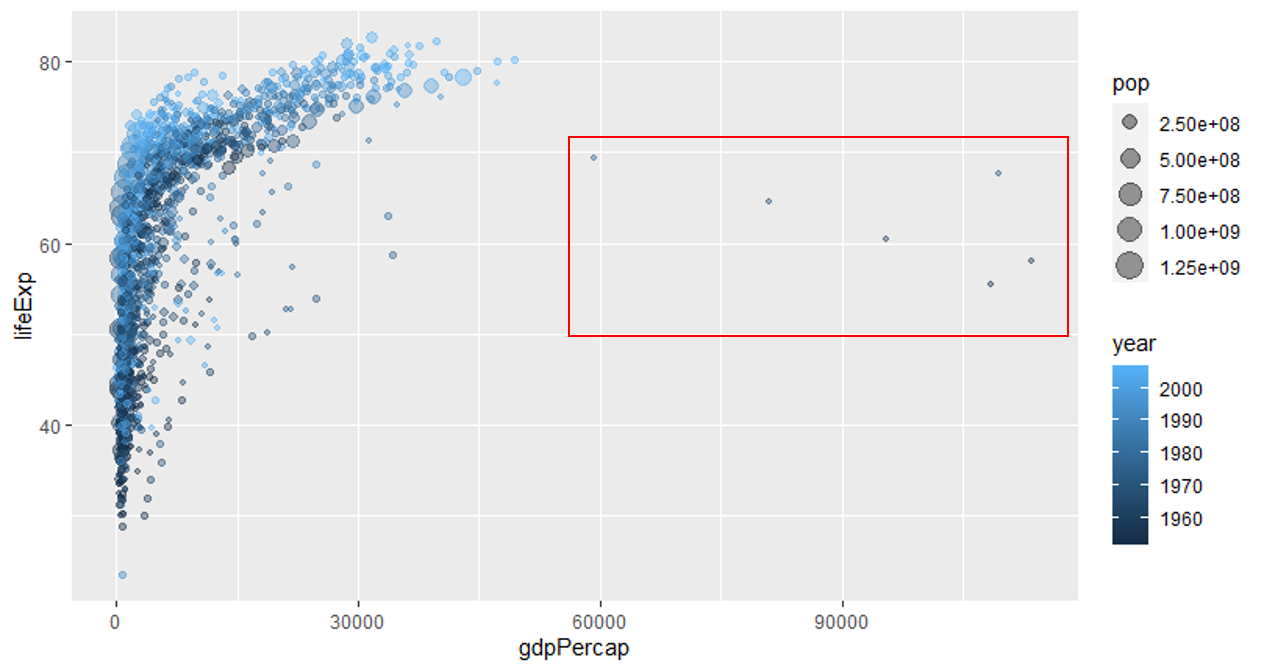

In [34]:
# P1 --------------------------------------------------
# Respuesta: Corresponde a Kuwait (1977,1972,1967,1957,1952)
install.packages("gapminder")
install.packages("ggrepel")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [38]:
library(gapminder)
library(tidyverse)
library(ggplot2)
library(ggrepel) 

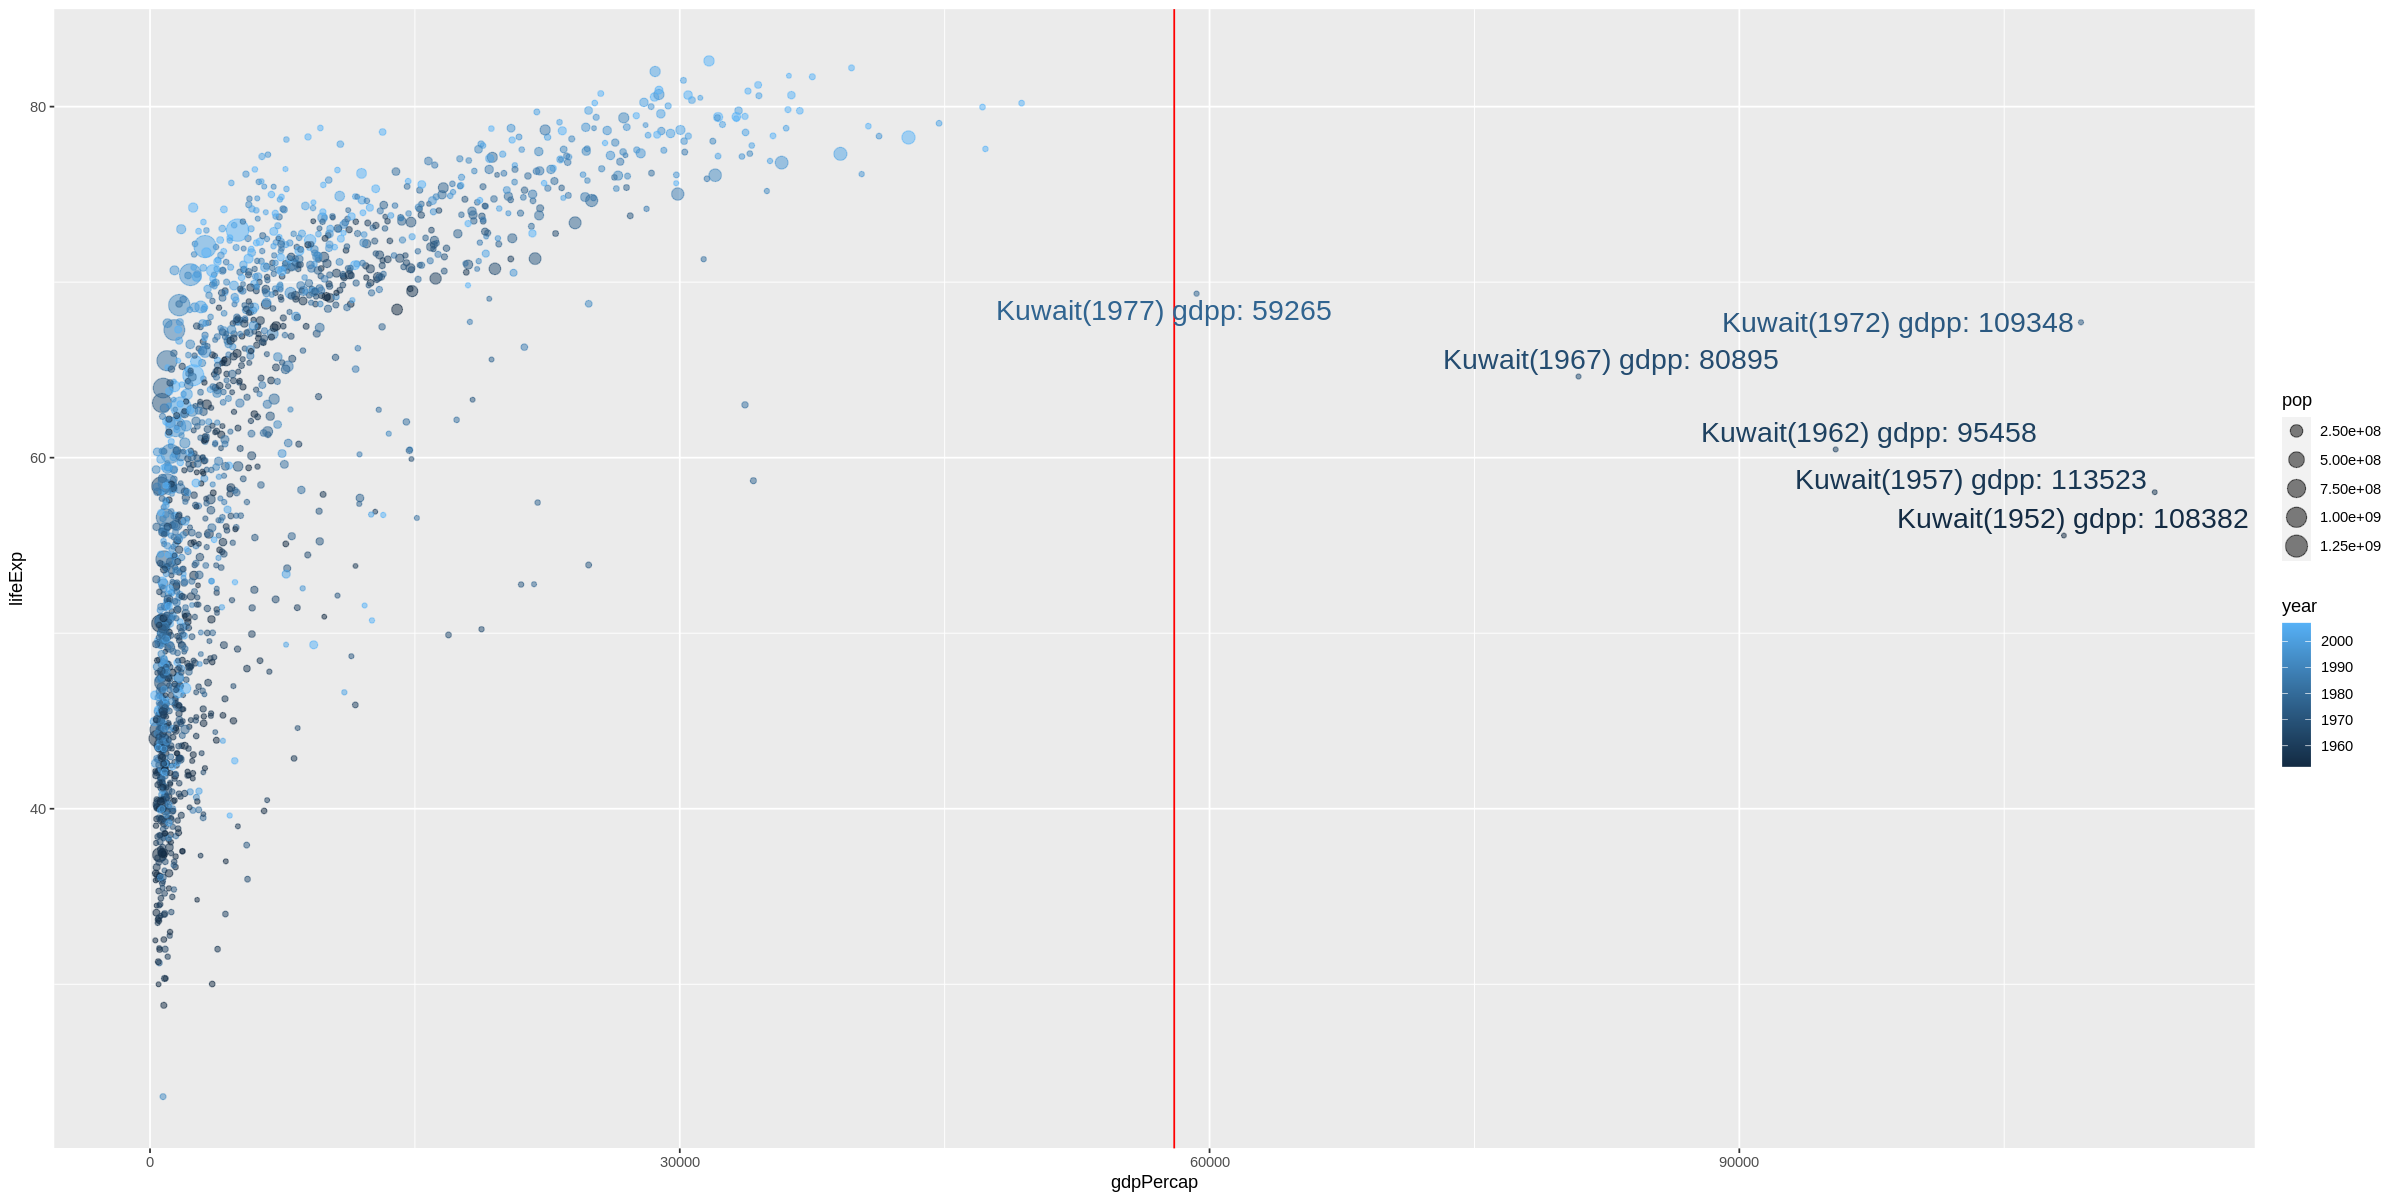

In [ ]:
options(repr.plot.width=20, repr.plot.height=10)

#según el grafico de la pregunta 1 , Se crea un grupo filtrando gdpPercp
grupo <- gapminder %>% 
  select(country, year, gdpPercap ,lifeExp , pop ) %>%
  filter( gdpPercap > 59000) %>% # Se filtra de acuerdo a la información del gráfico 
  mutate( text = paste(country , "(" , year , ") gdpp: ", round(gdpPercap), sep ="") )

gapminder %>% 
  ggplot()+
  aes(y=lifeExp,x=gdpPercap,color=year, size = pop )+
  geom_point( alpha = 0.5)+
  geom_vline( xintercept = 58000 , color = "red")+
  geom_text_repel(data = grupo , aes( label = text),  size=6)

**P2) (3pts)** Mediante un gráfico de puntos, visualice una comparativa entre la relación de ingresos y expectativa de vida, para los ños 1052 y 2007. Para ello usted deberá replicar el siguiente gráfico, donde el color representa a un continente distinto y el tamaño está dado por el total de población. 

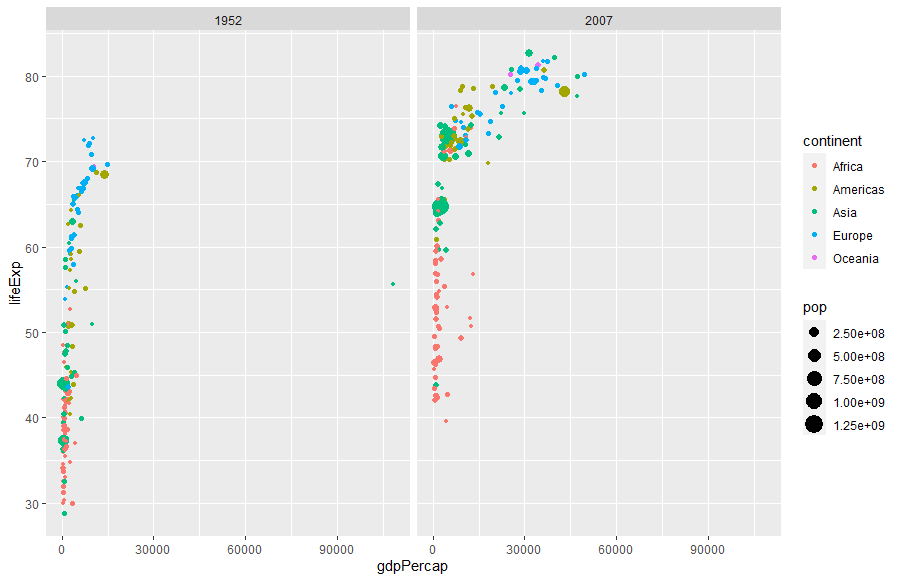

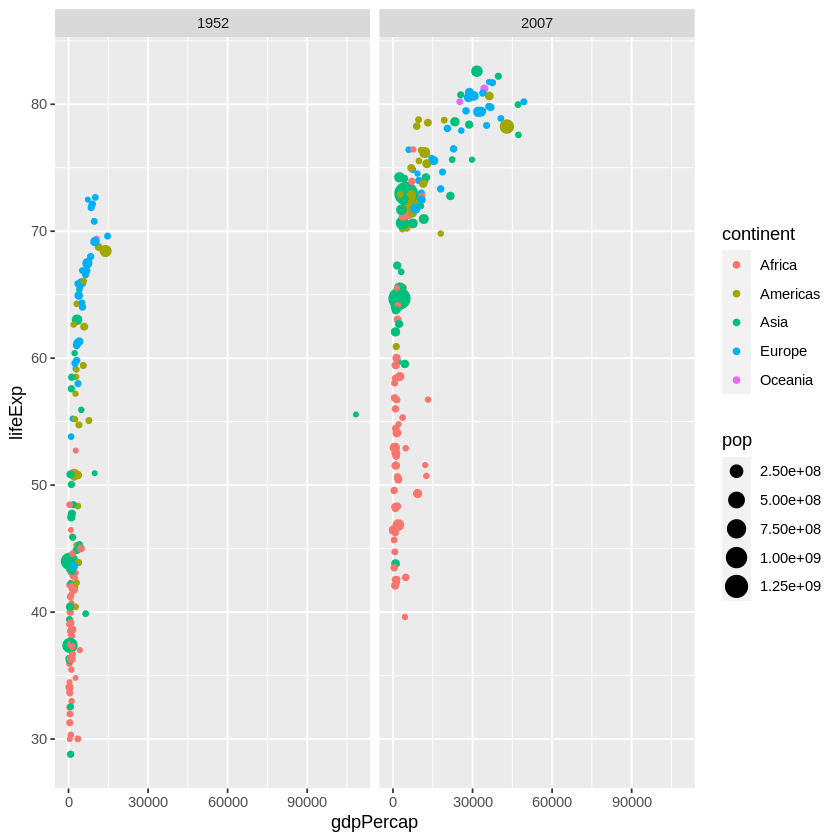

In [39]:
# P2 --------------------------------------------------
# Respuesta P2) La principal diferencia global fue un aumento relevante en su ingreso que llevó a una mejoría en la expectativa de vida, esto también se indica en continentes
# que tuvieron crecimientos exponenciales (Asia)

gapminder %>% 
  group_by(lifeExp,year) %>% 
  filter(year%in%c(1952,2007)) %>% 
  ggplot(aes(x=gdpPercap,y=lifeExp,color=continent,size=pop))+
  geom_point()+
  facet_grid(~factor(year))


**P3) (2pts)** Determine el nivel de correlación de **spearman**, entre las variables `gdpPercap` y `lifeExp` para cada uno de los años registrados. ¿En qué año se observa el mayor nivel de correlación entre ambas variables?

In [40]:
# P3 --------------------------------------------------
# Respuesta
#Es en 1992 el de mayor índice

gapminder %>%
  group_by(year) %>%
  summarise( r_spearman = cor(gdpPercap ,lifeExp, method = "spearman" )) %>%
  arrange(-r_spearman)


year,r_spearman
<int>,<dbl>
1992,0.8972412
1997,0.8950651
1987,0.8924654
2002,0.8652741
1982,0.8607685
2007,0.8565899
1977,0.8275408
1972,0.8067231
1962,0.7969564


**P4)** Para el año obtenido en la pregunta anterior, realice una breve descrición de la distribución de la expectativa de vida `lifeExp`. E indique lo siguiente

   **a) (1pt)** ¿Cuál fue la esperanza de vida promedio considerando todos los países registrados?<br>
   **b) (1pt)** ¿Cuál es el país que en dicho año tuvo la mayor esperanza de vida?<br>

 


Selecting by lifeExp

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



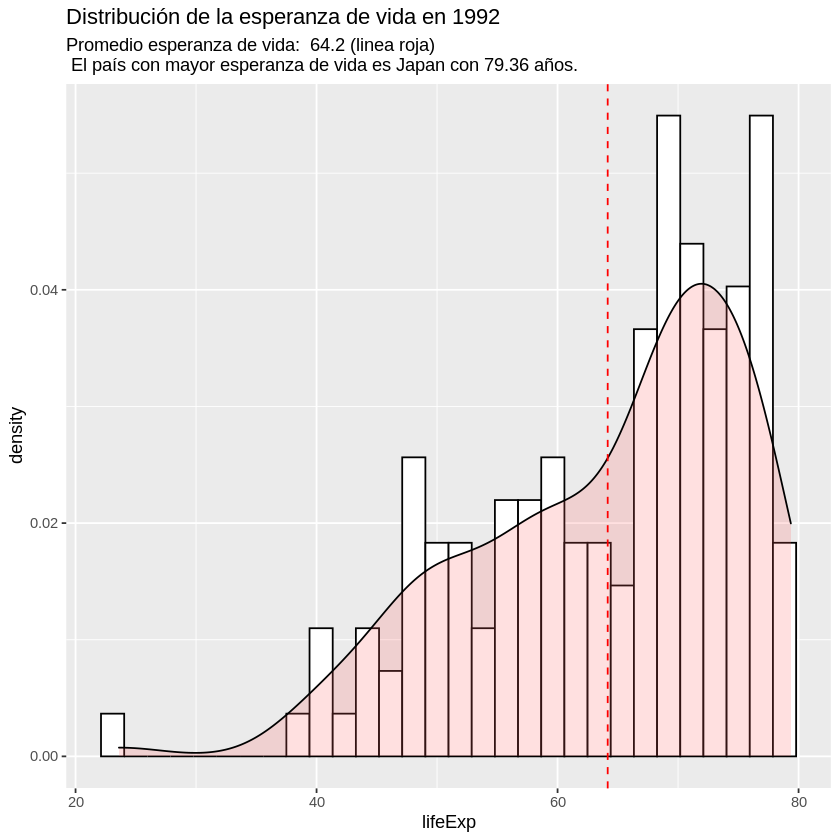

In [41]:
# P4 --------------------------------------------------
# Respuesta A) La esperanza promedio fueron 64,2 años 
# Respuesta B) El país con mayor esperanza de vida fue Japón (79,36 años)
#### promedio del año
mean_lifeExp <- gapminder %>%
  filter(year == 1992) %>%
  pull(lifeExp)%>%
  mean()%>%
  round(.,1)
### pais con mayor esperanza
pais_lifeExp_max <- gapminder %>%
  filter(year == 1992) %>%
  select(country , lifeExp) %>%
  arrange(-lifeExp) %>%
  top_n(1)

gapminder %>%
  filter(year == 1992) %>%
 ggplot( aes(x=lifeExp)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white")+
 geom_density(alpha=.2, fill="#FF6666") +
 geom_vline( aes(xintercept= mean(lifeExp)), color = "red",
             linetype="dashed")+
  labs(title = "Distribución de la esperanza de vida en 1992", 
      subtitle = paste("Promedio esperanza de vida: " , mean_lifeExp ,"(linea roja) \n" ,
      "El país con mayor esperanza de vida es" , as.character(pais_lifeExp_max$country) ,"con", 
      as.character(pais_lifeExp_max$lifeExp), "años."))



## En busca de la normalidad

Se sabe que una manera de estabilizar la variabilidad presente en una variable, es estudiando su logaritmo. A continuación usted deberá estudiar el comportamiento ddistribucional del loagritmo de la expectativa de vida.


**P5)** Considerando todos los años de observación, determine lo sguiente:

  **a) (2pts)**  Mediante el test de shapiro, indique los dos continentes que presentan un comportamiento normal en la distribución del logaritmo de `lifeExp`. <br>
  **b) (3pts)** Para los continentes encontrados en **a)**, grafique los histogramas para el logaritmo de `lifeExp`. Considere añadir estimaciones de las densidades, dadas por geom_density así como una densidad normal con parámetros de media y vrianza igual a la media y desviación estandar muestral. ¿Qué opina sobre el histograma de Oceanía? Comente sobre posibles causas de su aspecto.<br>
  **c) (2pts)** Complemente lo anterior, visualizando los qqplots para el logarimo de `lifeExp`.  Considere la utilización de las funciones `qqnorm()` y `qqline()` para el contraste contra una distribución normal.

In [ ]:
# P5 --------------------------------------------------
# Respuesta
install.packages("rstatix")
library(rstatix)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘corrplot’, ‘car’



Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [42]:
#P5 
#Respuesta A: África y Oceanía muestran una dist. normal de lifeExp logaritmica 
gapminder %>%
  mutate( lifeExpLog = log10(lifeExp)) %>%
  group_by(continent) %>%
  shapiro_test(lifeExpLog) %>%
  mutate( H_o = if_else(p < 0.05 , "rechazada" , "no rechazada") ) %>%
  filter(H_o == "no rechazada")

continent,variable,statistic,p,H_o
<fct>,<chr>,<dbl>,<dbl>,<chr>
Africa,lifeExpLog,0.9960272,0.11707285,no rechazada
Oceania,lifeExpLog,0.9287129,0.09124041,no rechazada


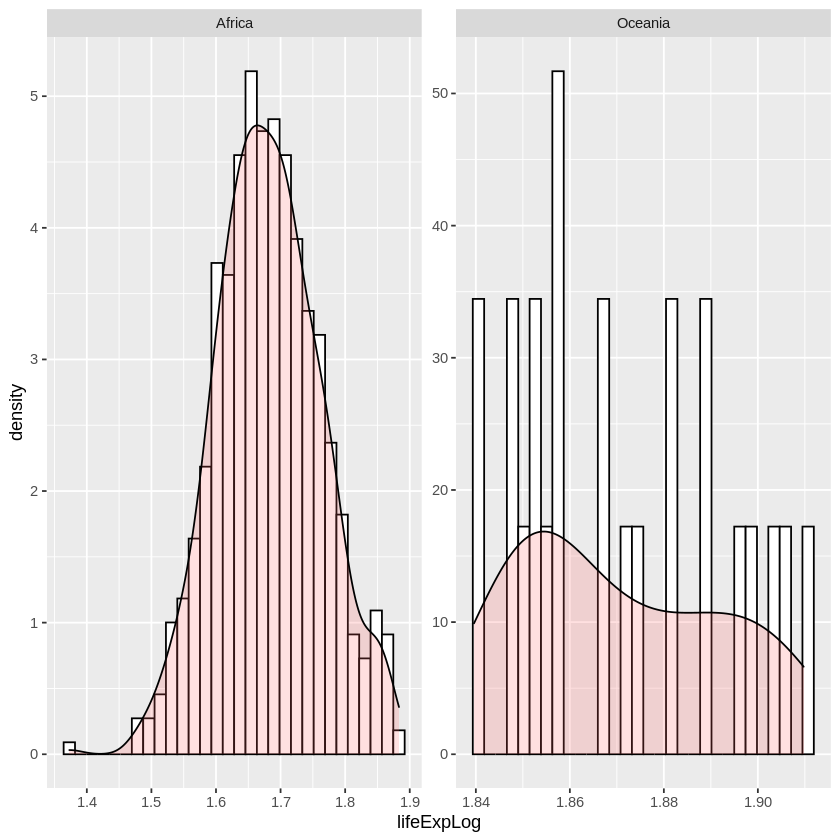

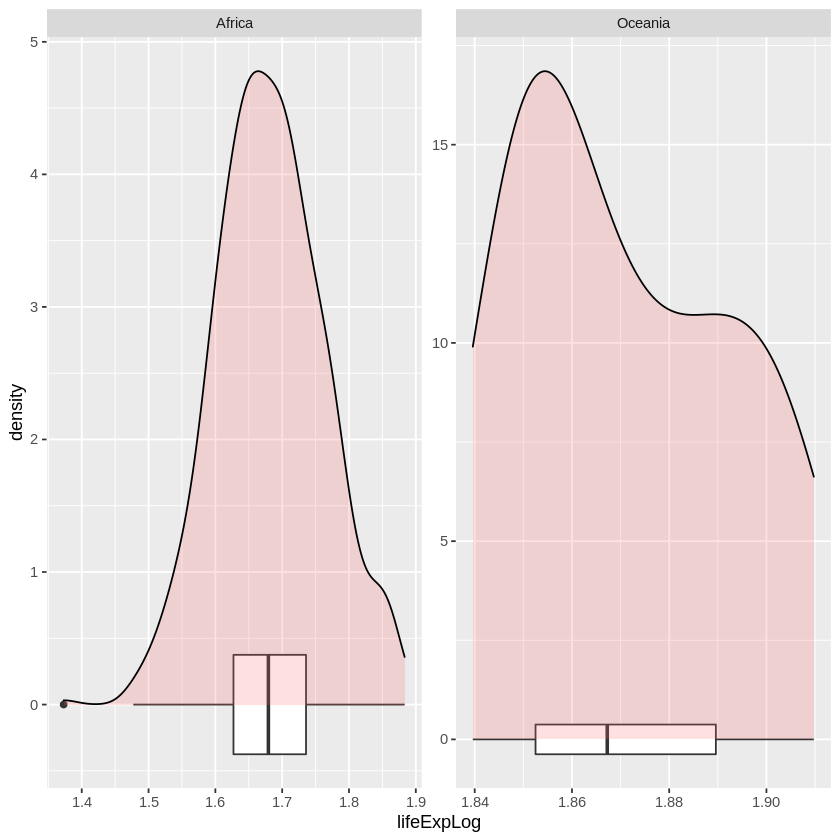

In [43]:
#P5
#Respuesta B: Que posee una distribución asimetrica en la densidad de su población, puede estar dado por una menor cantidad en ciertos segmentos 
gapminder %>%
 mutate(lifeExpLog = log10(lifeExp)) %>%
 filter(continent %in% c("Africa", "Oceania")) %>%
 ggplot( aes(x=lifeExpLog)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white" , bins = 30)+
 geom_density(alpha=.2, fill="#FF6666")+
 facet_wrap(~ continent, scales = "free")

gapminder %>%
 mutate(lifeExpLog = log10(lifeExp)) %>%
 filter(continent %in% c("Africa", "Oceania")) %>%
 ggplot( aes(x=lifeExpLog)) + 
 geom_boxplot()+
 geom_density(alpha=.2, fill="#FF6666")+
 facet_wrap(~ continent, scales = "free")

**P6) (3pts)** Considerando el continente de África, y asumiendo normalidad en el logaritmo de lifeExp. Independiente del año, ¿cuál es la probabilidad de que la **expectativa de vida** (`lifeExp`) sea superior a 54 años?



In [ ]:
# P6 --------------------------------------------------
# Respuesta# 


# Sección 2
## Cafetería
A usted se le solicita analizar las ventas de los distintos productos ofrecidos por una cafetería. Para ello usted deberá generar una descripción de dichas ventas,utilizando estadísticos descriptivos, gráficos  y además deberá incluir un análisis de la venta cruzada de los productos en cuestión. 

In [44]:
install.packages("arules")
library(arules)
library(tidyverse)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write




In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



El siguiente archivo ("cafeteria.csv") contiene los registros de las ventas de una cafetería en un determinado período.
Ustede deberá responder las siguientes preguntas con el objetivo de generar recomendaciones de ventas en distintos períodos de tiempo.

In [ ]:
# Cargue aquí el archivo "cafeteria.csv" 
cafeteria <- read.csv("https://raw.githubusercontent.com/majorquev/DBDC_202103_Programacion_en_R_para_ciencia_de_datos/main/Evaluaciones/Control3/cafeteria.csv")

In [ ]:
head(cafeteria)


,Date,Time,Transaction,Item
,<chr>,<chr>,<int>,<chr>
1,2016-10-30,09:58:11,1,Bread
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:05:34,2,Scandinavian
4,2016-10-30,10:07:57,3,Hot chocolate
5,2016-10-30,10:07:57,3,Jam
6,2016-10-30,10:07:57,3,Cookies


**P1) (2pts)** Genere tres nuevas columnas, que contengan la hora, minutos  y segundos de la transacción registrada.
A modo de referencia, su tabla debería contener al menos los siguientes campos (en la imagen se muestran sólo algunos registros de la tabla).

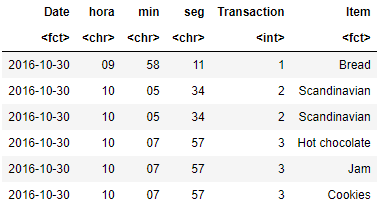

De ser de utilidad, puede consultar la documentación de las funciones substr y separate de los packages base y tidyr respectivamente.

In [81]:

cafeteria <- cafeteria %>%
mutate(hora=substr(Time, start = 1, stop =2),
min=substr(Time,start = 4, stop=5), 
seg = substr(Time,start=7, stop=8)) %>%
select(Date,Time,hora, min, seg, Transaction, Item)
head(cafeteria)

,Date,Time,hora,min,seg,Transaction,Item
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,2016-10-30,09:58:11,09,58,11,1,Bread
2,2016-10-30,10:05:34,10,05,34,2,Scandinavian
3,2016-10-30,10:05:34,10,05,34,2,Scandinavian
4,2016-10-30,10:07:57,10,07,57,3,Hot chocolate
5,2016-10-30,10:07:57,10,07,57,3,Jam
6,2016-10-30,10:07:57,10,07,57,3,Cookies


**P2) (4pts)**  Genere una tabla resumen que contenga la siguiente información.

* `hora`: Hora donde se registraron las transacciones. por ejemplo, el valor 09 indica el bloque horario comprendido entre las 09:00 y 09:59 hrs. 
* `total_trx` : total de transacciones distintas generadas en el bloque horario respectivo.
* `total_items`: total de items vendidos en el bloque horario respectivo.
* `total_items_unicos`: total de items únicos venidos en el bloque horario respectivo.


In [68]:
# P2 --------------------------------------------------
# Respuesta
franja_horaria <- filter(resumen, Time >= "09:00:00"& Time <= "09:59:59" )
head(franja_horaria)


,Date,Time,Transaction,Item,fecha_2,fecha,hora,min,seg
,<chr>,<chr>,<int>,<chr>,<chr>,<dttm>,<int>,<int>,<dbl>
1,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,2016-10-30 09:58:11,9,58,11
2,2016-10-31,09:04:06,84,Bread,2016-10-31 09:04:06,2016-10-31 09:04:06,9,4,6
3,2016-10-31,09:10:09,85,Coffee,2016-10-31 09:10:09,2016-10-31 09:10:09,9,10,9
4,2016-10-31,09:10:09,85,Coffee,2016-10-31 09:10:09,2016-10-31 09:10:09,9,10,9
5,2016-10-31,09:10:09,85,Pastry,2016-10-31 09:10:09,2016-10-31 09:10:09,9,10,9
6,2016-10-31,09:10:09,85,Medialuna,2016-10-31 09:10:09,2016-10-31 09:10:09,9,10,9


In [85]:
resumen_hora_trans <- cafeteria %>%
group_by(hora,Transaction) %>%
summarize(total_trx=n())

resumen_hora_item <- cafeteria %>%
group_by(hora, Item) %>%
summarize(total_items=n()) %>%
summarize(total_items_unicos=n_distinct(Item,na.rm=T))

resumen_item_unico <- cafeteria_2 %>%
select(hora,Item) %>%
distinct() %>%
count(Item)

resumen <- resumen_hora_trans %>%
left_join(resumen_hora_item, by="hora") %>%
arrange(desc(total_trx))

head(resumen,20)

`summarise()` has grouped output by 'hora'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'hora'. You can override using the `.groups` argument.



hora,Transaction,total_trx,total_items_unicos
<chr>,<int>,<int>,<int>
14,6474,12,68
13,6279,11,69
14,6412,11,68
14,6716,11,68
10,8835,10,64
11,6045,10,66
13,3673,10,69
13,7245,10,69
17,9447,10,47


**P3)** Con base en la tabla anterior, diremos que una hora pertenece al horario punta si la **cantidad de transacciones distintas** generadas en dicho bloque supera las 1000 transacciones. 

**a) (1pt)** ¿Qué horas comprende el horario punta?<br>
**b) (2pt)** En promedio, ¿cuántas transacciones distintas por hora se dieron en horario punta?¿y en horario no punta? 


In [90]:
# P3 --------------------------------------------------
# A) 
resumen %>% 
        filter(total_trx>1000) %>% 
        group_by(hora) %>% 
        summarise(total_trx)

#Horario punta 12-17
(resumen %>% filter(total_trx>1000) %>% 
   summarise(mean(total_trx)))

#Horario no punta 22:00 - 07:00
 (resumen %>% filter(total_trx<=1000) %>% 
   summarise(mean(total_trx)))



`summarise()` has grouped output by 'hora'. You can override using the `.groups` argument.



hora,total_trx
<chr>,<int>


hora,mean(total_trx)
<chr>,<dbl>


hora,mean(total_trx)
<chr>,<dbl>
01,1.000000
07,1.562500
08,1.784000
09,2.030785
10,2.180742
11,2.225606
12,2.242762
13,2.386930
14,2.421239


In [93]:
# B)
Landa<-resumen %>% filter(total_trx>1000) %>% 
          summarise(mean(total_trx))

**P4)** Se sabe que el total de personal disponible es capaz de atender como máximo, 1300 transacciones por hora, de modo que no se "sature" el sistema y que los tiempos de espera de los clientes sean razonables. Asumiendo que la cantidad de transacciones por hora tiene una distribución Poisson con parámetro $\lambda$ igual al estimado en la pregunta **3.b** responda lo siguiente:

**a) (2pt)** ¿Cuál es la probabilidad de que en horario punta se den **más de 1300** transacciones en una hora? ¿Cómo interpretaría este valor? Comente.<br>
**b) (1pt)** Con el objetivo de reducir costos, se propone limitar el personal disponible a modo de poder atender como máximo 1250 transacciones por hora. ¿Que tan probable es que se supere este máximo de transacciones por hora ? ¿Recomendaría usted esta medida? <br>
**c) (2pt)** Usted sugiere modificar la cantidad de personal pero teniendo en cuenta de que se garantice la atención de al menos un 95% de las transacciones por hora. ¿Cuántas transacciones por hora se deberían poder gestionar en este escenario?

In [95]:
# P4 --------------------------------------------------
# Respuesta A 
ppois(1300, lambda =as.numeric(landa),lower.tail = F)




ERROR: ignored

In [94]:
# Respuesta B 

ppois(1250, lambda =as.numeric(landa))

ERROR: ignored

### Análisis de los productos vendidos.
Con el objetivo de aumentar las ventas, se le solicita a usted analizar los itmes y las ventas cruzadas entre los productos ofrecidos. Para ello usted guía su análisis en función de las siguientes preguntas.

**P5) (2pt)** ¿Cuáles son los 5 items más vendidos? Ilustre mediante un gráfico de barras o una tabla.

In [ ]:
# Respuesta:
#Son Café, pan, té, pasteles y sandwich 
 cafeteria %>%
      group_by(Item)%>% summarise(mas_vendida=sum(Transaction))%>% 
       arrange(desc(mas_vendida)) %>% head(5)

Item,mas_vendida
<chr>,<int>
Coffee,27084057
Bread,16213533
Tea,7030856
Cake,5932362
Sandwich,4344466


**P6) (4pts)** ¿Cambian estos 5 ítems según el horario de atención? Para ello muestre los 5 items más vendidos en los siguientes horarios.

* 7:00-11:59
* 12:00-16:59
* 17:00-23:59

In [76]:
# Respuesta
#Efectivamente cambia el comportamiento asociado a la compra de los productos de acuerdo al horario, pero si existe un comportamiento en los primeros 3 asociados al 
#consumo de la trinidad: Café, té y pan 

#Tabla 1: Café, Pan, Pastelería, Té y Pastel
#Franja 07:00-11:59
     resumen %>%filter(Time >="07:00:00" & Time<="11:59:00") %>% 
       group_by(Item)%>% summarise(mas_vendidos=sum(Transaction))%>% 
       arrange(desc(mas_vendidos)) %>% head(5)

#Tabla 2: Café, Pan, Té, Pastel y Sandwich
#Franja 12:00-16:59
     resumen %>%filter(Time >="12:00:00" & Time<="16:59:00") %>% 
       group_by(Item)%>% summarise(mas_vendidos=sum(Transaction))%>% 
       arrange(desc(mas_vendidos)) %>% head(5)

#Tabla 3: Café, Té, Pan, Pasteles y poleras
#Franja 17:00 - 23:59
     resumen %>%filter(Time >="17:00:00" & Time<="23:59:00") %>% 
       group_by(Item)%>% summarise(mas_vendidos=sum(Transaction))%>% 
       arrange(desc(mas_vendidos)) %>% head(5)


Item,mas_vendidos
<chr>,<int>
Coffee,12230457
Bread,7597627
Pastry,2725596
Tea,2100334
Cake,1505376


Item,mas_vendidos
<chr>,<int>
Coffee,14331292
Bread,8265211
Tea,4644769
Cake,4221869
Sandwich,3761607


Item,mas_vendidos
<chr>,<int>
Coffee,423072
Tea,269814
Bread,261526
Cake,188927
Tshirt,126226


### Genereación de reglas

**P7)** Considerando un **support mínimo de 0.02** , un  **confidence mínimo de 0.1** y teniendo en cuenta que **no se deben considerar reglas de asociación cuyo antecedente o consecuente sean vacíos**,

**a) (2pts)** ¿Cuál es la regla de asociación más frecuente en cada uno de los horarios indicados en **P6)**?<br>
**b) (2pts)** ¿Cuál es la regla de asociación con mayor confidence en cada uno de los horarios indicados en **P6)**? <br>
**c) (2pts)** ¿Cuál es la regla de asociación con mayor lift en cada uno de los horarios indicados en **P6)**? <br>

**NOTA:** En caso de no obtener reglas con los parámetros indicados, modifíquelos, pero tenga en consideración este hecho al momento de argumentar las preguntas posteriores.

In [ ]:
# Respuesta



**P8)** Se quiere potenciar un segundo producto por la compra de un café en los tres horarios definidos previamente en **P6**.

**a) (3pts)** Genere tres listados (uno por cada rango horario) con todas las reglas que contengan el producto `Coffee` en el antecedente.<br>
**b) (2pts)** ¿Qué promoción recomendaría en cada horario por la compra de un café?. Justifique su respuesta basándose en los indicadores support, confidence y lift.
